<a href="https://colab.research.google.com/github/ShabnaIlmi/SpamSense-AI/blob/main/True_News_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Relevant Libaries**

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Mounting the Google Drive**

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading the Dataset**

In [ ]:
# Defining the file path
file_path = "/content/drive/MyDrive/Multi-Type-Spam-Detection/Dataset/True.csv"

# Loading the dataset with the correct delimiter (semicolon)
data = pd.read_csv(file_path, encoding="utf-8")

In [ ]:
# Displaying the dataset head
data.head()

,title,text,subject,date,status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,Not Spam
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,Not Spam
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,Not Spam
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,Not Spam
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,Not Spam


# **Exploratatry Data Analysis - True**





In [ ]:
# Displaying dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   status   21417 non-null  object
dtypes: object(5)
memory usage: 836.7+ KB


# **Identifying Categorical and Numerical Columns**

In [ ]:
# Identifying Categorical and Numerical Columns
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# **Categorical Features**

In [ ]:
# Displaying the Categorical Features
print("\nCategorical Features:\n")
print(categorical_columns)


Categorical Features:

Index(['title', 'text', 'subject', 'date', 'status'], dtype='object')


**Unique Values and Their Counts Relevant to Each categorical Feature**

In [ ]:
# Displaying the Unique Values and Their Counts Relevant to Each Categorical Column
print("Unique values and their count relevant to each categorical feature:\n")
for column in categorical_columns:
    unique_values = data[column].unique()
    value_counts = data[column].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical feature:

title
Factbox: Trump fills top jobs for his administration                                14
Factbox: Contenders for senior jobs in Trump's administration                        8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday     8
Factbox: International reaction to arrest of Reuters reporters in Myanmar            6
Highlights: The Trump presidency on April 21 at 6:12 p.m. EDT/2212 GMT               5
                                                                                    ..
Obama, on last trip to Europe, warns against nationalism, populism                   1
A post-Trump SEC could shake up current policy                                       1
U.S. panel urges probe on whether China weakening U.S. militarily                    1
Trump team weighs 'infrastructure bank' to fund projects: Trump adviser              1
Indonesia to buy $1.14 billion worth of Russian jets   

# **Numerical Features**

In [ ]:
# Displaying the Numerical Features
print("\nNumerical Features:\n")
print(numerical_columns)


Numerical Features:

Index([], dtype='object')


**There is no visible numerical columns in this dataset.**

# **Visualization of the Target Variable**

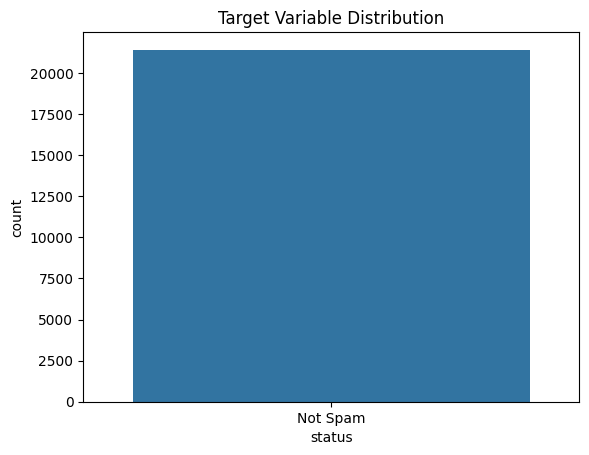

In [ ]:
# Visualization of the Distribution of the Target Variable
sns.countplot(data=data, x='status')
plt.title('Target Variable Distribution')
plt.show()

# **Data Preprocessing**

### **Cleaning the Dataset**

In [ ]:
# Step 1: Removing Whitespaces From the Object Type Columns
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns] = data[object_columns].apply(lambda x: x.str.strip())

In [ ]:
# Step 2: Removing Duplicate Values
print(f"Initial dataset shape: {data.shape}")
data = data.drop_duplicates()
print(f"Shape after removing duplicates: {data.shape}")

Initial dataset shape: (21417, 5)
Shape after removing duplicates: (21211, 5)


In [ ]:
# Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21211 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21211 non-null  object
 1   text     21211 non-null  object
 2   subject  21211 non-null  object
 3   date     21211 non-null  object
 4   status   21211 non-null  object
dtypes: object(5)
memory usage: 994.3+ KB


In [ ]:
# Step 3: Removing the 'Date' Column
data = data.drop('date', axis=1)

In [ ]:
# Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21211 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21211 non-null  object
 1   text     21211 non-null  object
 2   subject  21211 non-null  object
 3   status   21211 non-null  object
dtypes: object(4)
memory usage: 828.6+ KB


In [ ]:
# Saving the Dataset
data.to_csv('/content/drive/MyDrive/Multi-Type-Spam-Detection/Dataset/True_Cleaned.csv', index=False)

# **Categorical Columns**


# **Data Encoding**

**Applying Label Encoding for the
Categorical Features**

In [ ]:
# Step 5: Applying Label Encoding for the Categorical Columns

# Listing the Categorical Features for Encoding
categorical_features = data.select_dtypes(include=['object']).columns

# Encoding the categorical Features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

In [ ]:
# Displaying dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21211 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   title    21211 non-null  int64
 1   text     21211 non-null  int64
 2   subject  21211 non-null  int64
 3   status   21211 non-null  int64
dtypes: int64(4)
memory usage: 828.6 KB
